# Unsupervised ML (Clustering)

This phase requires process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.

District_wise_crimes_committed_IPC_2001_2012.csv

In [1]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)
import datetime as dt

In [2]:
df=pd.read_csv("District_wise_crimes_committed_IPC_2001_2012.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,2,0,0,1,3,21,81,53,28,17,1,15,1,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,14,3,5,14,13,56,577,409,168,109,8,75,5,20,632,0,7,2,5,0,219,1668,3494


In [3]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507


In [4]:
df.tail()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,2,0,0,1,3,21,81,53,28,17,1,15,1,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,14,3,5,14,13,56,577,409,168,109,8,75,5,20,632,0,7,2,5,0,219,1668,3494
9016,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,19,16,3,5,15,16,77,658,462,196,126,9,90,6,21,818,0,9,2,6,0,263,2060,4281


In [5]:
df.shape

(9017, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [7]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

From above we can see that there are no null values present as there are 9017 rows and every column has 9017 non null values

In [8]:
df.duplicated().sum()

0

As we can see there are no duplicated values

In [9]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [10]:
df=df[df['DISTRICT']!='TOTAL']

In [11]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,6
9011,DELHI UT,WEST,2012,52,37,10,79,0,79,454,256,198,2,4,52,186,2352,1733,619,5,36,202,2,18,227,18,53,6,327,0,292,1144,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,2,0,0,1,3,21,81,53,28,17,1,15,1,1,186,0,2,0,1,0,44,392,787


In [12]:
IPC_CRIMES=df[['STATE/UT','DISTRICT','YEAR','TOTAL IPC CRIMES']]
IPC_CRIMES

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507
...,...,...,...,...
9010,DELHI UT,STF,2012,6
9011,DELHI UT,WEST,2012,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,KARAIKAL,2012,787


### Grouping the dataset according to the states/UT

In [13]:
df1 = df.groupby(['STATE/UT','DISTRICT']).sum()
df1 = df1.drop(['YEAR'], axis=1)
df1= df1.reset_index()
df1

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,A and N ISLANDS,15,19,1,3,0,3,12,9,3,5,0,9,90,112,8,104,17,7,23,1,11,99,1,21,2,18,0,4,337,807
1,A & N ISLANDS,ANDAMAN,118,41,18,92,0,92,73,61,12,4,0,63,708,918,77,841,115,57,196,9,80,910,3,168,37,97,0,32,3638,7377
2,A & N ISLANDS,CAR,2,0,0,0,0,0,1,1,0,1,0,0,0,4,0,4,0,0,2,0,0,4,0,1,0,0,0,1,8,24
3,A & N ISLANDS,NICOBAR,12,2,2,2,0,2,1,0,1,1,0,0,23,23,0,23,0,3,3,0,3,34,0,8,0,1,0,0,117,235
4,A & N ISLANDS,NORTH,5,0,0,4,0,4,0,0,0,0,0,1,6,13,0,13,0,0,3,0,0,8,0,2,1,2,0,0,70,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,WEST BENGAL,PURULIA,733,12,85,497,0,497,276,198,78,63,182,278,49,2526,246,2280,920,64,376,1,24,205,106,601,0,1778,0,206,7976,16958
824,WEST BENGAL,SEALDAH G.R.P.,188,58,21,19,0,19,67,36,31,18,152,115,0,2981,4,2977,128,17,94,9,0,247,11,56,2,10,0,4,549,4746
825,WEST BENGAL,SILIGURI G.R.P.,42,3,6,2,0,2,31,23,8,13,6,15,1,1154,0,1154,26,3,6,3,0,0,3,31,1,1,0,0,413,1760
826,WEST BENGAL,SILIGURI_PC,32,6,6,21,0,21,123,111,12,3,5,29,3,849,365,484,9,53,195,0,3,812,3,35,12,370,0,69,385,3023


Now we have all the States/UT with their sum of total crimes present under the column Total IPC crimes. We will use this dataset to create the clusters as needed.

## Create 3 clusters

### Standardising the data for clustering

In [16]:
x = df1.iloc[:,2:]
x

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,15,19,1,3,0,3,12,9,3,5,0,9,90,112,8,104,17,7,23,1,11,99,1,21,2,18,0,4,337,807
1,118,41,18,92,0,92,73,61,12,4,0,63,708,918,77,841,115,57,196,9,80,910,3,168,37,97,0,32,3638,7377
2,2,0,0,0,0,0,1,1,0,1,0,0,0,4,0,4,0,0,2,0,0,4,0,1,0,0,0,1,8,24
3,12,2,2,2,0,2,1,0,1,1,0,0,23,23,0,23,0,3,3,0,3,34,0,8,0,1,0,0,117,235
4,5,0,0,4,0,4,0,0,0,0,0,1,6,13,0,13,0,0,3,0,0,8,0,2,1,2,0,0,70,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,733,12,85,497,0,497,276,198,78,63,182,278,49,2526,246,2280,920,64,376,1,24,205,106,601,0,1778,0,206,7976,16958
824,188,58,21,19,0,19,67,36,31,18,152,115,0,2981,4,2977,128,17,94,9,0,247,11,56,2,10,0,4,549,4746
825,42,3,6,2,0,2,31,23,8,13,6,15,1,1154,0,1154,26,3,6,3,0,0,3,31,1,1,0,0,413,1760
826,32,6,6,21,0,21,123,111,12,3,5,29,3,849,365,484,9,53,195,0,3,812,3,35,12,370,0,69,385,3023


In [18]:
x = df1.drop(columns=['STATE/UT', 'DISTRICT'])
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
xscaled = scalar.fit_transform(x)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(2)
x1 = pca.fit_transform(x)

In [20]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=65)

y = model.fit_predict(x1) 
y

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

0.6241118129421768

We have a silhouette score of 62%

In [22]:
df1['sensitivity'] = model.labels_
df1

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
0,A & N ISLANDS,A and N ISLANDS,15,19,1,3,0,3,12,9,3,5,0,9,90,112,8,104,17,7,23,1,11,99,1,21,2,18,0,4,337,807,0
1,A & N ISLANDS,ANDAMAN,118,41,18,92,0,92,73,61,12,4,0,63,708,918,77,841,115,57,196,9,80,910,3,168,37,97,0,32,3638,7377,0
2,A & N ISLANDS,CAR,2,0,0,0,0,0,1,1,0,1,0,0,0,4,0,4,0,0,2,0,0,4,0,1,0,0,0,1,8,24,0
3,A & N ISLANDS,NICOBAR,12,2,2,2,0,2,1,0,1,1,0,0,23,23,0,23,0,3,3,0,3,34,0,8,0,1,0,0,117,235,0
4,A & N ISLANDS,NORTH,5,0,0,4,0,4,0,0,0,0,0,1,6,13,0,13,0,0,3,0,0,8,0,2,1,2,0,0,70,115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,WEST BENGAL,PURULIA,733,12,85,497,0,497,276,198,78,63,182,278,49,2526,246,2280,920,64,376,1,24,205,106,601,0,1778,0,206,7976,16958,0
824,WEST BENGAL,SEALDAH G.R.P.,188,58,21,19,0,19,67,36,31,18,152,115,0,2981,4,2977,128,17,94,9,0,247,11,56,2,10,0,4,549,4746,0
825,WEST BENGAL,SILIGURI G.R.P.,42,3,6,2,0,2,31,23,8,13,6,15,1,1154,0,1154,26,3,6,3,0,0,3,31,1,1,0,0,413,1760,0
826,WEST BENGAL,SILIGURI_PC,32,6,6,21,0,21,123,111,12,3,5,29,3,849,365,484,9,53,195,0,3,812,3,35,12,370,0,69,385,3023,0


We have added the column sensitivity to tell which state comes in which sensitivity area. And from careful analysis we have came to the conclusion that 

peaceful states are with 0 , 
moderate states with 2 and 
sensitive states as 1

## 4.2) Create DataFrame for each cluster that shows data according to the areas.

In [23]:
peaceful_states = df1[df1['sensitivity'] == 0]
sensitive_states = df1[df1['sensitivity'] == 1]
moderate_states =df1[df1['sensitivity'] == 2]

In [25]:
sensitive_states

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
170,DELHI UT,DELHI UT TOTAL,6205,5277,883,6424,0,6424,25083,15650,9433,381,1241,6461,23555,231546,127017,104529,996,4725,26128,520,564,22210,1582,7534,1687,15211,1,7503,237457,633174,1
331,KARNATAKA,BANGALORE COMMR.,2831,4067,54,642,1,641,3014,947,2067,529,2219,6740,19968,105434,52116,53318,4665,2211,26401,772,48,37973,552,2630,407,3832,0,1182,124176,350347,1


In [26]:
moderate_states

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
6,ANDHRA PRADESH,ADILABAD,1186,869,151,672,0,672,754,570,184,72,0,237,2519,3964,755,3209,1016,254,1932,33,395,16392,188,1785,1242,4126,0,3593,20579,61959,2
7,ANDHRA PRADESH,ANANTAPUR,1922,1248,51,266,0,266,839,554,285,137,1,244,2536,6079,1736,4343,1293,240,1445,114,444,17682,174,2026,622,1645,0,5058,15861,59927,2
8,ANDHRA PRADESH,CHITTOOR,1270,739,32,368,0,368,907,531,376,96,0,207,2777,11077,2820,8257,973,350,2694,171,419,13543,262,1381,2179,3283,0,8168,24575,75471,2
9,ANDHRA PRADESH,CUDDAPAH,1196,506,38,298,0,298,653,522,131,39,0,106,1549,4530,1283,3247,1326,336,1894,48,337,14301,146,1708,538,1790,0,4815,21993,58147,2
10,ANDHRA PRADESH,CYBERABAD,1810,914,96,641,0,641,1398,857,541,141,7,765,11946,29665,10842,18823,559,1174,11423,88,491,32697,437,1372,3168,8932,4,10314,23701,141743,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,WEST BENGAL,BURDWAN,1290,397,377,796,0,796,864,551,313,142,724,407,247,6629,1675,4954,3280,117,1227,42,128,1709,370,924,14,5160,1,5109,22351,52305,2
813,WEST BENGAL,JALPAIGURI,1345,798,504,1777,0,1777,1853,1536,317,132,115,477,507,13229,1671,11558,791,695,555,60,121,5558,123,1887,5,6745,0,2884,24018,64179,2
816,WEST BENGAL,KOLKATA,596,1159,256,433,0,433,1534,1178,356,151,580,1007,1434,41317,8166,33151,2993,3237,14360,480,0,19434,118,2572,1107,4362,27,5334,55938,158429,2
819,WEST BENGAL,MURSHIDABAD,1644,2657,480,3352,0,3352,2943,2519,424,152,665,391,114,7833,1609,6224,3143,355,1125,281,248,18652,384,3487,33,17229,0,3198,17323,85689,2


In [24]:
peaceful_states

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
0,A & N ISLANDS,A and N ISLANDS,15,19,1,3,0,3,12,9,3,5,0,9,90,112,8,104,17,7,23,1,11,99,1,21,2,18,0,4,337,807,0
1,A & N ISLANDS,ANDAMAN,118,41,18,92,0,92,73,61,12,4,0,63,708,918,77,841,115,57,196,9,80,910,3,168,37,97,0,32,3638,7377,0
2,A & N ISLANDS,CAR,2,0,0,0,0,0,1,1,0,1,0,0,0,4,0,4,0,0,2,0,0,4,0,1,0,0,0,1,8,24,0
3,A & N ISLANDS,NICOBAR,12,2,2,2,0,2,1,0,1,1,0,0,23,23,0,23,0,3,3,0,3,34,0,8,0,1,0,0,117,235,0
4,A & N ISLANDS,NORTH,5,0,0,4,0,4,0,0,0,0,0,1,6,13,0,13,0,0,3,0,0,8,0,2,1,2,0,0,70,115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,WEST BENGAL,PURULIA,733,12,85,497,0,497,276,198,78,63,182,278,49,2526,246,2280,920,64,376,1,24,205,106,601,0,1778,0,206,7976,16958,0
824,WEST BENGAL,SEALDAH G.R.P.,188,58,21,19,0,19,67,36,31,18,152,115,0,2981,4,2977,128,17,94,9,0,247,11,56,2,10,0,4,549,4746,0
825,WEST BENGAL,SILIGURI G.R.P.,42,3,6,2,0,2,31,23,8,13,6,15,1,1154,0,1154,26,3,6,3,0,0,3,31,1,1,0,0,413,1760,0
826,WEST BENGAL,SILIGURI_PC,32,6,6,21,0,21,123,111,12,3,5,29,3,849,365,484,9,53,195,0,3,812,3,35,12,370,0,69,385,3023,0


## 4.3 Analyse your clusters and prepare a report that explains all your observations.

# Most Sensitive areas

In [28]:
sensitive_states['STATE/UT'].value_counts()

DELHI UT     1
KARNATAKA    1
Name: STATE/UT, dtype: int64

In [29]:
sensitive_states["DISTRICT"].value_counts()

DELHI UT TOTAL      1
BANGALORE COMMR.    1
Name: DISTRICT, dtype: int64

In [30]:
peaceful_states['STATE/UT'].value_counts()

UTTAR PRADESH        69
BIHAR                40
MADHYA PRADESH       36
ODISHA               36
RAJASTHAN            35
PUNJAB               35
JAMMU & KASHMIR      35
MAHARASHTRA          31
ASSAM                31
KARNATAKA            27
CHHATTISGARH         26
JHARKHAND            25
GUJARAT              23
WEST BENGAL          23
TAMIL NADU           22
HARYANA              22
DELHI UT             20
ARUNACHAL PRADESH    17
HIMACHAL PRADESH     15
UTTARAKHAND          13
ANDHRA PRADESH       13
KERALA               12
MANIPUR              12
NAGALAND             11
TRIPURA              10
MIZORAM               8
MEGHALAYA             7
A & N ISLANDS         6
SIKKIM                4
PUDUCHERRY            3
GOA                   2
DAMAN & DIU           2
LAKSHADWEEP           1
D & N HAVELI          1
CHANDIGARH            1
Name: STATE/UT, dtype: int64

In [35]:
moderate_states['STATE/UT'].value_counts()

ANDHRA PRADESH    21
TAMIL NADU        20
MADHYA PRADESH    17
MAHARASHTRA       15
KERALA            14
RAJASTHAN         14
GUJARAT           13
UTTAR PRADESH      8
KARNATAKA          7
WEST BENGAL        7
BIHAR              4
DELHI UT           4
CHHATTISGARH       3
ASSAM              2
HARYANA            2
JHARKHAND          1
Name: STATE/UT, dtype: int64

In [37]:
sensitive_states['OVERALL CRIME'] = sensitive_states.iloc[:,2:].sum(axis=1)
sensitive_states.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)
sensitive=sensitive_states.reset_index().drop(['index'],axis=1)
sensitive

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity,OVERALL CRIME
0,DELHI UT,DELHI UT TOTAL,6205,5277,883,6424,0,6424,25083,15650,9433,381,1241,6461,23555,231546,127017,104529,996,4725,26128,520,564,22210,1582,7534,1687,15211,1,7503,237457,633174,1,1529402
1,KARNATAKA,BANGALORE COMMR.,2831,4067,54,642,1,641,3014,947,2067,529,2219,6740,19968,105434,52116,53318,4665,2211,26401,772,48,37973,552,2630,407,3832,0,1182,124176,350347,1,809785


In [42]:
s=sensitive[['STATE/UT','DISTRICT',"OVERALL CRIME"]]
s

,STATE/UT,DISTRICT,OVERALL CRIME
0,DELHI UT,DELHI UT TOTAL,1529402
1,KARNATAKA,BANGALORE COMMR.,809785


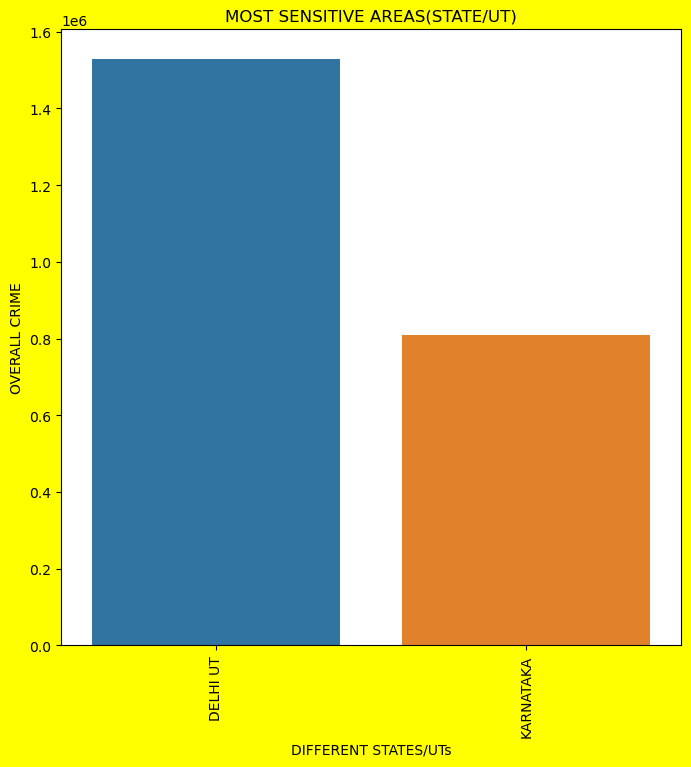

In [46]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=sensitive['STATE/UT'],y=sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("MOST SENSITIVE AREAS(STATE/UT)")
plt.show()

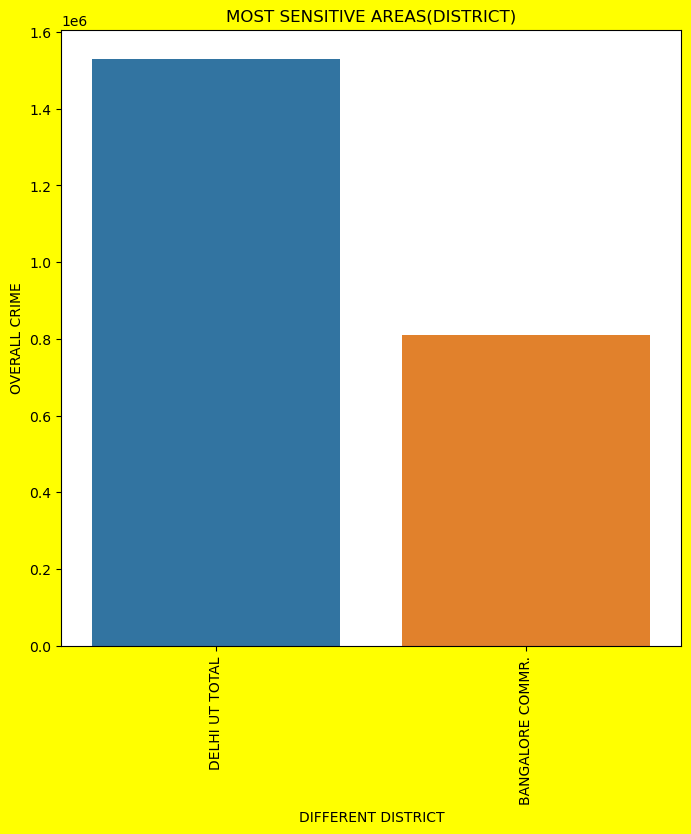

In [47]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=sensitive['DISTRICT'],y=sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT DISTRICT")
plt.title("MOST SENSITIVE AREAS(DISTRICT)")
plt.show()

## Most peaceful areas

In [48]:
peaceful_states['OVERALL CRIME'] = peaceful_states.iloc[:,2:].sum(axis=1)
peaceful_states.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)
Peaceful=peaceful_states.reset_index().drop(['index'],axis=1)
Peaceful

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity,OVERALL CRIME
0,MAHARASHTRA,SATARA,728,394,46,370,1,369,327,234,93,279,49,898,4140,9795,3026,6769,2114,548,1453,58,307,5545,73,751,146,2161,0,4839,13679,48700,0,107892
1,MAHARASHTRA,AMRAVATI RURAL,774,411,33,642,0,642,278,258,20,104,17,362,3294,10746,776,9970,1242,174,486,19,715,10291,63,1565,394,1501,0,1996,12649,47756,0,107178
2,UTTAR PRADESH,GAUTAMBUDH NAGAR,944,900,183,255,0,255,882,637,245,99,10,1068,1294,18613,12125,6488,943,776,2415,40,18,407,211,392,395,882,0,2340,10133,43200,0,106150
3,MAHARASHTRA,BEED,832,643,33,322,0,322,419,259,160,391,60,914,3577,7119,1699,5420,4587,309,925,16,563,11603,112,995,129,3542,0,2933,9117,49141,0,106142
4,RAJASTHAN,JAIPUR EAST,137,188,15,193,0,193,468,402,66,20,22,641,2448,16231,12031,4200,717,264,4300,27,45,271,60,310,4,1338,0,1452,15382,44533,0,105958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,HIMACHAL PRADESH,CID,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,12,14,0,29
670,JAMMU & KASHMIR,RAILWAYS KMR,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,7,10,0,20
671,MANIPUR,CID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,0,0,0,0,0,0,0,0,0,1,9,0,18
672,TRIPURA,G.R.P.,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,3,0,0,0,0,0,1,0,1,0,0,0,0,0,6,0,15


In [49]:
P=Peaceful[['STATE/UT','DISTRICT',"OVERALL CRIME"]]
P

,STATE/UT,DISTRICT,OVERALL CRIME
0,MAHARASHTRA,SATARA,107892
1,MAHARASHTRA,AMRAVATI RURAL,107178
2,UTTAR PRADESH,GAUTAMBUDH NAGAR,106150
3,MAHARASHTRA,BEED,106142
4,RAJASTHAN,JAIPUR EAST,105958
...,...,...,...
669,HIMACHAL PRADESH,CID,29
670,JAMMU & KASHMIR,RAILWAYS KMR,20
671,MANIPUR,CID,18
672,TRIPURA,G.R.P.,15


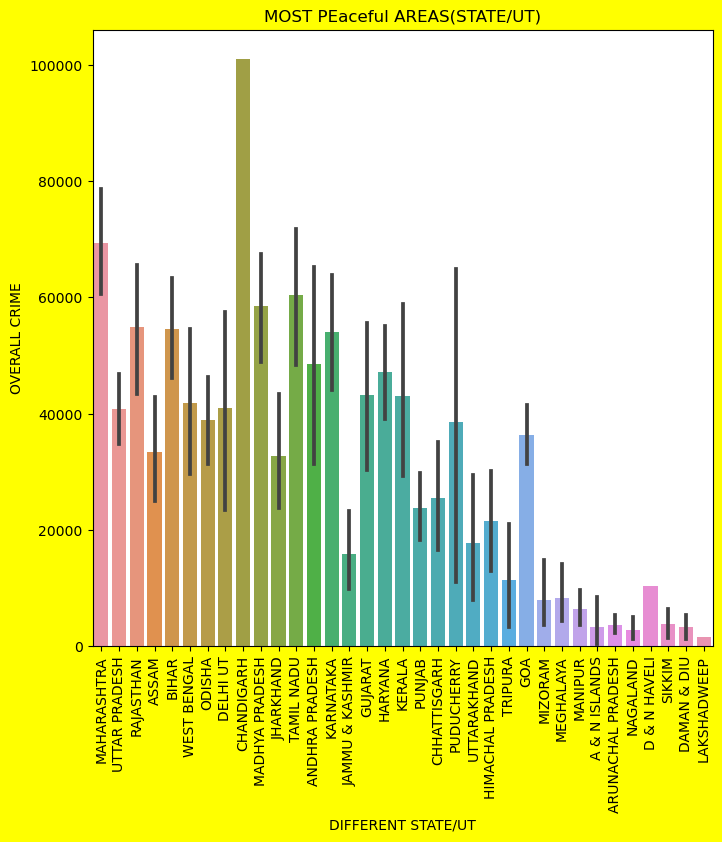

In [64]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=Peaceful['STATE/UT'],y=Peaceful['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATE/UT")
plt.title("MOST PEaceful AREAS(STATE/UT)")
plt.show()

We can see that the peaceful areas have much more lesser crimes as compared to most sensitive areas. Hence, we can say that these are the most safe states or areas

## 1. What is impacting more crimes in sensitive areas.

In [68]:
s=sensitive[['STATE/UT','DISTRICT',"OVERALL CRIME"]]
s

,STATE/UT,DISTRICT,OVERALL CRIME
0,DELHI UT,DELHI UT TOTAL,1529402
1,KARNATAKA,BANGALORE COMMR.,809785


And the states in the Sensitive areas are the states are one of the biggest states of India in terms of area. They are also highly populated.

Various factors can contribute to increased crime rates, such as drug abuse, the prevalence of gang culture, inadequate government law enforcement, low literacy rates, discrimination, human trafficking, and poor infrastructure. Gender inequality may be a significant factor contributing to the high occurrence of rape cases

## 2. What needs to be done to reduce crime. 

Crime prevention plays a vital role in creating a safer and more secure society, minimising the risks associated with criminal behaviour and the impact of crime on individuals, communities, and the nation. Implementing robust crime prevention strategies and measures benefits various aspects of society, from improving individual well-being to fostering economic growth.

Reducing crime rates in any country requires a comprehensive approach involving various stakeholders and addressing multiple factors.Expedite the judicial process and ensure swift and fair trials. Increase the number of courts and judges to reduce the backlog of cases. Implement measures to improve witness protection and enhance the efficiency of the criminal justice system. Crime prevention is critical to maintain law and order in the country.

increasing the effort required for criminals to commit the crime
increasing the risk for offenders to be caught
reducing the rewards from the crime
removing excuses that justify criminal behaviour
reducing crime provocations and opportunities in the environment.

## 3. Most safe and unsafe districts.

  - **Most Unsafe State**: 

top 3 states: 

(1).MADHYA PRADESH(INDORE)-204398 

(2).MAHARASHTRA (MUMBAI COMMR.)-222670

(3).TAMIL NADU (CHENNAI) -164467

  **Madhya Pradesh** emerges as the most unsafe state, and **indore** is top crime district reporting a total of 204398 out of 2413770 IPC crimes.

  - **Most safest State(District)**: 

top 3 states:

(1).LAKSHADWEEP (LAKSHADWEEP)-743

(2).DAMAN & DIU (DAMAN)-2398

(3).D & N HAVELI (D and N HAVELI)-4651

  **LAKSHADWEEP** emerges as the most safest Region, reporting only a total of 743 IPC crimes.

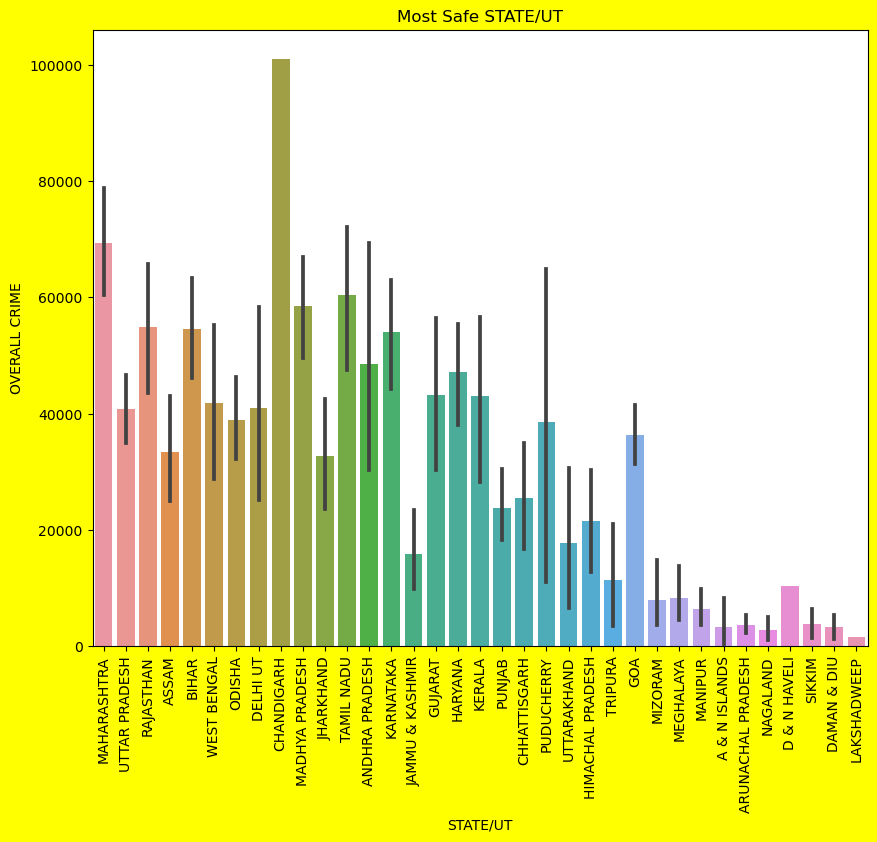

In [71]:
#Plotting for most safe states/UTs
plt.figure(figsize=(10,8), facecolor='Yellow')
sns.barplot(x=peaceful_states['STATE/UT'], y=peaceful_states['OVERALL CRIME'])
plt.xlabel('STATE/UT')
plt.title('Most Safe STATE/UT')
plt.xticks(rotation=90)
plt.show()

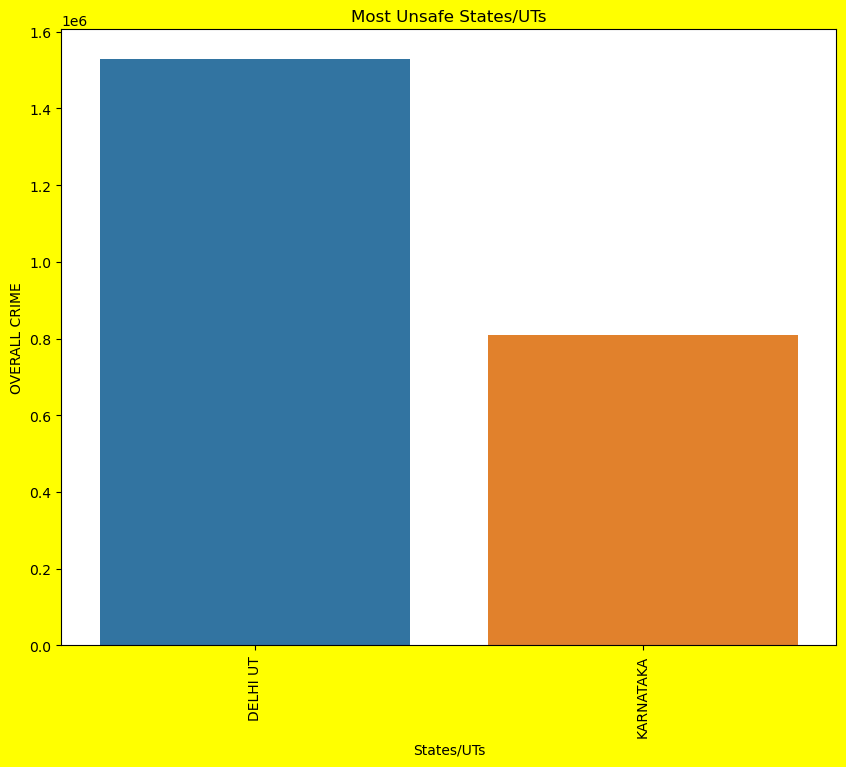

In [72]:
#Plotting graph for most unsafe states
plt.figure(figsize=(10,8), facecolor='Yellow')
sns.barplot(x=sensitive_states['STATE/UT'], y=sensitive_states['OVERALL CRIME'])
plt.xlabel('States/UTs')
plt.title('Most Unsafe States/UTs')
plt.xticks(rotation=90)
plt.show()

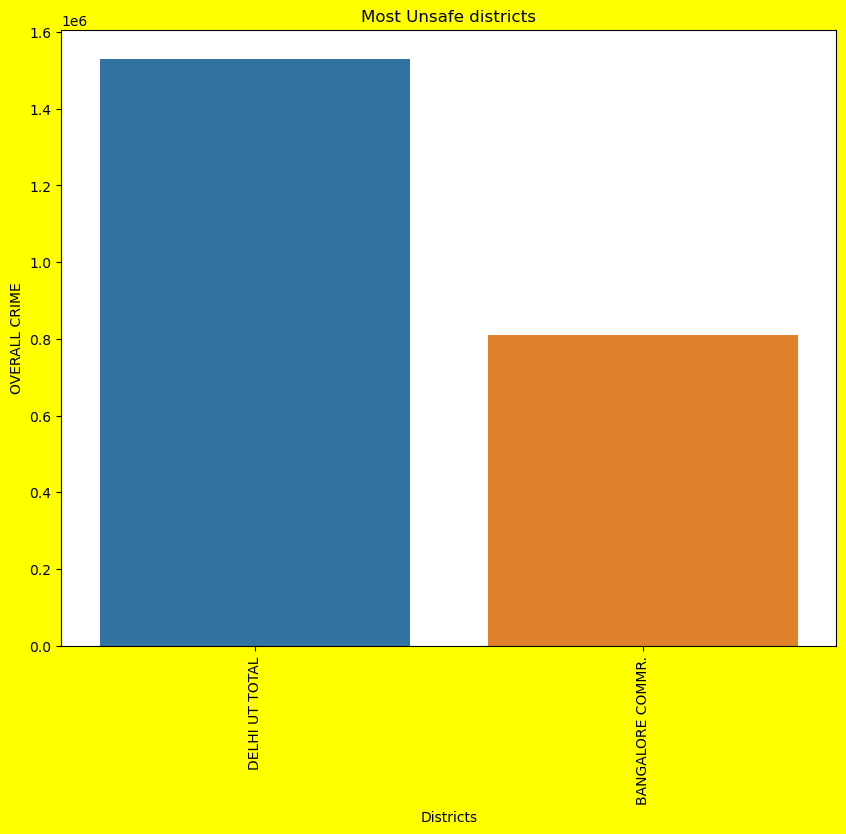

In [73]:
#Plotting for most Unsafe districts
plt.figure(figsize=(10,8), facecolor='Yellow')
sns.barplot(x=sensitive_states['DISTRICT'], y=sensitive_states['OVERALL CRIME'])
plt.xlabel('Districts')
plt.title('Most Unsafe districts')
plt.xticks(rotation=90)
plt.show()

## 4. What could be don't reduce crimes?

 Reducing crime requires a multifaceted approach with a focus on several key aspects. Here are some strategies that can contribute to crime reduction:

     - Enhancing Literacy Rates: Elevating literacy rates is pivotal in diminishing crime levels within a state or country.

     - Promoting Civil Rights Awareness: Creating awareness about civil rights is crucial. Knowledge of one's rights empowers individuals to prevent wrongdoing.

     -  Strengthening Government Institutions: Robust government bodies are essential for taking effective actions and maintaining control over potential crises.

     - Addressing Gender Inequality: Tackling gender inequality is paramount, especially in reducing rape cases. The government should enact comprehensive legislation and schemes, coupled with public education initiatives.

     -  Employment Opportunities: Combatting unemployment is vital, as it can be a contributing factor to crime. Government initiatives and policies aimed at generating employment opportunities are crucial.

     -  Youth Engagement Programs: Implementing programs that engage and empower the youth, providing them with constructive outlets for their energy and talents, can deter involvement in criminal activities.

     - Substance Abuse Prevention: Initiatives focusing on preventing substance abuse can help mitigate crimes related to drug abuse and addiction.

     - Social Support Systems: Strengthening social support systems, including mental health services and rehabilitation programs, can address underlying issues that may lead to criminal behavior.

     - Technological Solutions: Leveraging technology for surveillance, crime mapping, and predictive policing can enhance law enforcement capabilities.

     - International Cooperation: Collaborating with international organizations and neighboring countries to address transnational crimes and share best practices in crime prevention.

     - Educational Reforms: Implementing educational reforms that emphasize values, ethics, and conflict resolution can contribute to creating a more law-abiding society.

     - Restorative Justice Programs: Introducing restorative justice programs that focus on rehabilitation and reconciliation rather than solely punitive measures.

## 4.4) Capstone project overall story in your own words. Min 1000 words.

Our capstone project tasked us with analyzing crime data in India, specifically focusing on states/union territories (UT) and districts. The dataset covered the period from 2001 to 2012, and Datatrained Academy provided us with 11 files to use for our analysis.

The data wes not enough so we were told to fetch more data from any source, be it manually or by doing webscrapping. The project was divided into 4 phases.

**PHASE 1** was to collect the data and keep the collected data in a new file. The Data which we needed to collect was:-
**The population of each state**.

**Literacy Rate in each state**

**Area of each state**.

During **PHASE 2** of the project, we were instructed to conduct a detailed analysis of the data at the STATE/UT level. Various analytical approaches were employed, such as investigating the relationship between Literacy Rate and Total Crimes, examining the correlation between the types of crimes and each state in conjunction with Literacy Rate, studying the year-on-year total crime rate, exploring the impact of area on overall crime, and delving into the relationship between population and overall crime. As the culmination of Phase 2, we thoroughly analyzed each state and compiled comprehensive crime reports based on the insights gained from the diverse sources of data we collected.

In the subsequent phase, **PHASE 3** , our focus shifted to executing SQL operations. Specifically, we were tasked with crafting SQL queries to perform various operations on the 11 files supplied by the Datatrained Academy. The central objective of this phase involved the insertion of data into a designated table, followed by the extraction of information in accordance with specific requirements. To enhance our analytical capabilities, we not only stored relevant data in DataFrames but also engaged in visualization techniques towards the conclusion of this phase.

**PHASE 4** of our project delved into the realm of clustering, employing unsupervised machine learning techniques. The primary objective was to categorize the data into distinct clusters representing peaceful, moderate, and sensitive areas based on their crime statistics. The initial step involved consolidating the data by state, followed by the application of the KMeans algorithm, resulting in the partitioning of the data into three segments: **Cluster 0 (Peaceful), Cluster 1 (sensitive), and Cluster 2 (moderate)**.

The classification criteria were established by evaluating the total crimes in each area. Peaceful areas were characterized by the lowest incidence of total crimes, while moderate areas exhibited an average level of total crimes. On the contrary, sensitive areas emerged as the most unsafe regions, characterized by a notably high occurrence of total crimes.

Following the segmentation process, we meticulously constructed a dedicated dataframe for each cluster. Our in-depth analysis brought forth compelling insights, notably identifying **Madhya Pradesh as the most unsafe state and Lakshadweep as the safest state based on their respective total crime rates**.

Upon conducting a meticulous analysis, we unearthed various correlated factors that shed light on how different states are grouped into their respective clusters. Our investigation delved into the factors influencing total IPC crimes, exploring the impact of education levels, population, literacy rates, and the area of the state on their clustering. Our findings highlighted the distinct types and levels of crimes across different regions, providing valuable insights into the complex dynamics of crime distribution.

Additionally, we delved into strategies and measures aimed at mitigating the crime rate and overall incidence of criminal activities. Our discussions encompassed a diverse range of techniques and approaches that could be employed to address the complex issue of crime, exploring avenues for proactive intervention and fostering a safer societal environment.